In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,1.25,1,321.692754,1
1,1,3.04,6,560.000000,1
2,1,1.50,0,824.000000,1
3,1,3.75,5,3.000000,1
4,1,1.71,0,321.692754,1


In [4]:
#### Independent And Dependent features
X=df.drop('Approved',axis=1)
y=df['Approved']

In [5]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
df_classifier=DecisionTreeClassifier().fit(X_train,y_train)
prediction=df_classifier.predict(X_test)

In [7]:
from sklearn import tree

[Text(670.4259868421053, 525.48, 'X[0] <= 0.5\ngini = 0.494\nsamples = 552\nvalue = [305, 247]'),
 Text(268.72105263157897, 489.24, 'X[1] <= 0.062\ngini = 0.123\nsamples = 259\nvalue = [242, 17]'),
 Text(114.53684210526316, 453.0, 'X[3] <= 310.846\ngini = 0.245\nsamples = 56\nvalue = [48, 8]'),
 Text(70.48421052631579, 416.76, 'X[3] <= 3.0\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(52.863157894736844, 380.52, 'X[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(35.242105263157896, 344.28, 'X[1] <= 0.02\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(17.621052631578948, 308.04, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(52.863157894736844, 308.04, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(70.48421052631579, 344.28, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(88.10526315789474, 380.52, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(158.58947368421053, 416.76, 'X[3] <= 1347.0\ngini = 0.358\nsamples = 30\nvalue = [23, 7]'),
 Text(123.347

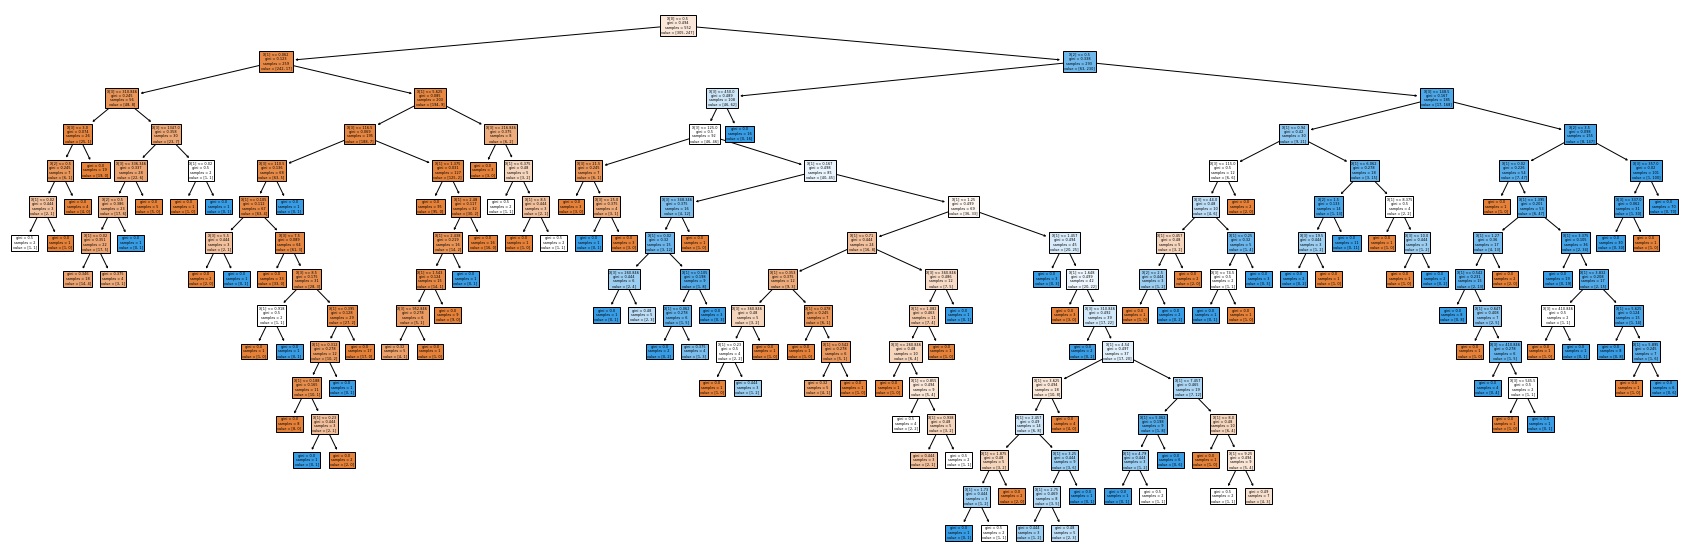

In [8]:
plt.figure(figsize=(30,10))
tree.plot_tree(df_classifier,filled=True)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[67 11]
 [16 44]]
Accuracy Score : 0.8043478260869565
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.80      0.73      0.77        60

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



In [10]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
 "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
 "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Classifier=DecisionTreeClassifier()

In [12]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
df_random = RandomizedSearchCV(estimator = Classifier, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=10, n_jobs = 1)

In [13]:
df_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, max_leaf

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4],
                                        'splitter': ['best', 'random']},
                   random_state=10, verbose=2)

In [14]:
df_random.best_params_

{'splitter': 'random',
 'min_weight_fraction_leaf': 0.3,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 6}

In [15]:
best_random_grid=df_random.best_estimator_

In [16]:
print(best_random_grid)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4,
                       min_weight_fraction_leaf=0.3, splitter='random')


In [17]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[64 14]
 [ 6 54]]
Accuracy Score: 0.855072463768116
Classification report:               precision    recall  f1-score   support

           0       0.91      0.82      0.86        78
           1       0.79      0.90      0.84        60

    accuracy                           0.86       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138



In [18]:
import pickle
# save the model to disk
filename='finalized_model_DT.sav'
pickle.dump(df_random, open(filename, 'wb'))